In [ ]:
import pandas as pd
import tweepy 
import time
import warnings 
warnings.filterwarnings('ignore')
import re

In [ ]:
ACCESS_TOKEN = '3175593740-3tvKouOzlvpbaxAloiuuGrvUl5C4cKxTxUT4W53'
ACCESS_SECRET = 'b4nK6iNBllL7JBE9wb5ak2ZMJh0e8aFjwXErGU34fpYII'
CONSUMER_KEY = 'vyLzJzi3rGIht0kYrr9cdW3py'
CONSUMER_SECRET = 'wyPEz4AOy4zQNv8clam5pMkWzLpmU2VoMSKBoMxGFOERNeYVXz'



# twitter api 

def connect_to_twitter_OAuth():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    api = tweepy.API(auth)
    return api


api = connect_to_twitter_OAuth()


In [ ]:
# as crpto coins ---> let us analyze all the tweets from major cryptocoins handle 

crypto_list = {'@ethereum','@litecoin','@Tether_to','@dogecoin','@Polkadot','@btc' }

#crypto_list = {'@narendramodi'}

In [ ]:
tweet_list = []


for crypto in crypto_list: 
  crypto_tweets = api.user_timeline(crypto, count = 300)
  time.sleep(1)

  for tweet in crypto_tweets: 
    tweet_id = tweet.id 
    text = tweet.text 
    favorite_count = tweet.favorite_count 
    retweet_count = tweet.retweet_count 
    source = tweet.source 
    reply_to_status = tweet.in_reply_to_status_id 
    reply_to_user = tweet.in_reply_to_screen_name
    created_at = tweet.created_at 
    tweet_list.append({'crypto':crypto,
                          'tweet_id':tweet_id, 
                          'text':text, 
                          'favorite_count':favorite_count,
                          'retweet_count':retweet_count,
                          'created_at':created_at, 
                          'source':source, 
                          'reply_to_status':reply_to_status, 
                          'reply_to_user':reply_to_user})

In [ ]:
tweet_data = pd.DataFrame(tweet_list)

In [ ]:
tweet_data.head()

,crypto,tweet_id,text,favorite_count,retweet_count,created_at,source,reply_to_status,reply_to_user
0,@Tether_to,1450849743626776581,🎉 #Tether token USDt has just surpassed $70B m...,270,37,2021-10-20 15:41:49,Twitter Web App,NaN,None
1,@Tether_to,1450815609441341446,RT @paoloardoino: Presenting the #Tether Truth...,0,198,2021-10-20 13:26:10,Twitter Web App,NaN,None
2,@Tether_to,1450812612254519301,Tether responds to cynical bounty -- Hindenbur...,255,35,2021-10-20 13:14:16,Twitter Web App,NaN,None
3,@Tether_to,1449078812097093633,RT @bitcoinlawyer: On @bitfinex 's and @Tether...,0,109,2021-10-15 18:24:46,Twitter Web App,NaN,None
4,@Tether_to,1449031920009064448,Putting the past behind us so we can move forw...,1165,281,2021-10-15 15:18:26,Twitter Web App,NaN,None


In [ ]:
tweet_data.to_csv('twitter_data.csv')

time : 21:11 to set up tweet feed 


# working break : Tell me which is the crypto coin handle which has got the highest sum of fav count and retweet_count 
# plto a graph 


# source for tweets 

21:14 ---> 21:31 ---> 

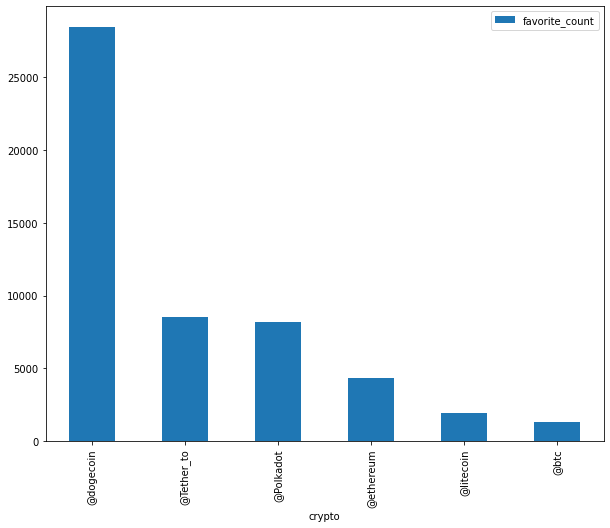

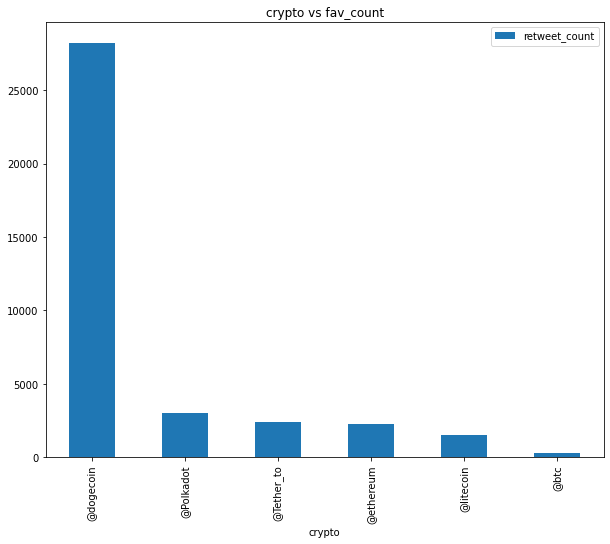

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
df= pd.DataFrame(tweet_data.groupby(['crypto'])['favorite_count'].max().sort_values(ascending = False))
df1= pd.DataFrame(tweet_data.groupby(['crypto'])['retweet_count'].max().sort_values(ascending = False))
df.plot.bar(figsize=(10,8))
df1.plot.bar(figsize=(10,8))
plt.title('crypto vs fav_count')
plt.show()

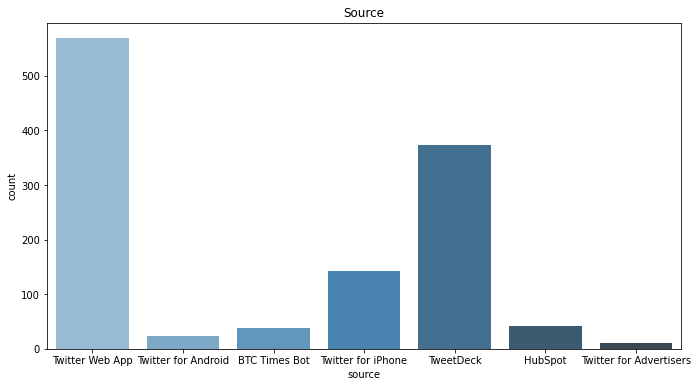

In [ ]:
plt.figure(figsize=(25,6))

plt.subplot(1,2,1)
plt.title('Source')
sns.countplot(tweet_data.source, palette=("Blues_d"))

In [ ]:
data = tweet_data.copy()

In [ ]:
max_values = tweet_data.groupby('crypto').agg(sum)[['retweet_count', 'favorite_count']]

In [ ]:
max_values

,retweet_count,favorite_count
crypto,,
@Polkadot,34920.0,78635.0
@Tether_to,13199.0,46454.0
@btc,7524.0,21312.0
@dogecoin,162797.0,449180.0
@ethereum,30853.0,10357.0
@litecoin,21432.0,50615.0


In [ ]:
import plotly.express as pc 
import plotly.graph_objects as go

In [ ]:
fig = go.Figure()
fig.add_bar(x = max_values.index, y = max_values.retweet_count, name = 'retweets' )
fig.add_bar(x = max_values.index, y = max_values.favorite_count, name = 'likes' )

In [ ]:
crypto_data = data['crypto'].value_counts()

In [ ]:
crypto_data

@litecoin     200
@ethereum     200
@Polkadot     200
@btc          200
@Tether_to    200
@dogecoin     199
Name: crypto, dtype: int64

In [ ]:
def hashtag_extract(x):
  hashtags = []
  ht = re.findall(r"#(\w+)", x)
  hashtags.extend(ht)
  if hashtags==[]:
    return ''
  return hashtags


In [ ]:
tags = []

for x in data.text: 
  tags.append(hashtag_extract(x))

In [ ]:
tags

[['Tether'],
 ['Tether'],
 '',
 '',
 '',
 '',
 ['Tether'],
 '',
 ['tether'],
 '',
 ['Tether'],
 '',
 ['tether'],
 ['Finance', 'News'],
 ['Tether'],
 ['Tether'],
 '',
 '',
 '',
 '',
 '',
 '',
 ['PolyNetwork'],
 '',
 ['Tether'],
 ['crypto', 'stablecoins', 'tether'],
 '',
 '',
 ['tether'],
 '',
 '',
 ['PolyNetwork', 'crypto'],
 ['Tether'],
 ['PolyNetwork'],
 '',
 ['DeFi', 'tether'],
 ['tether'],
 '',
 '',
 '',
 ['bitcoin', 'tether', 'Bitfinex'],
 '',
 '',
 ['Tether'],
 ['Tether'],
 '',
 ['Tether'],
 ['Tether'],
 ['Tether'],
 '',
 ['Tether'],
 '',
 ['BMI', 'BridgeMutual'],
 ['Tether'],
 '',
 '',
 '',
 ['Tether'],
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 ['Tether'],
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 ['tether'],
 ['tether'],
 '',
 '',
 '',
 ['Tether'],
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 ['Solana'],
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 ['Tether'],
 ['onward'],
 '',
 '',
 '',
 '',
 '',
 '',
 ['Tether'],
 '',
 '',
 '',
 '',
 '',
 '',
 '',

In [ ]:
# assignment  can you all find the number of hastags and their count

In [ ]:
data['tidy_tweet'] = data['text'].replace(to_replace= '(@[\w]+)' , value = '', regex = True)
data['tidy_tweet'] = data['tidy_tweet'].replace(to_replace =('RT'), value ='',regex = True ) 

In [ ]:
data.head()

,crypto,tweet_id,text,favorite_count,retweet_count,created_at,source,reply_to_status,reply_to_user,tidy_tweet
0,@Tether_to,1450849743626776581,🎉 #Tether token USDt has just surpassed $70B m...,270,37,2021-10-20 15:41:49,Twitter Web App,NaN,None,🎉 #Tether token USDt has just surpassed $70B m...
1,@Tether_to,1450815609441341446,RT @paoloardoino: Presenting the #Tether Truth...,0,198,2021-10-20 13:26:10,Twitter Web App,NaN,None,: Presenting the #Tether Truthooooor https://...
2,@Tether_to,1450812612254519301,Tether responds to cynical bounty -- Hindenbur...,255,35,2021-10-20 13:14:16,Twitter Web App,NaN,None,Tether responds to cynical bounty -- Hindenbur...
3,@Tether_to,1449078812097093633,RT @bitcoinlawyer: On @bitfinex 's and @Tether...,0,109,2021-10-15 18:24:46,Twitter Web App,NaN,None,: On 's and 's settlement with the CFTC -- ...
4,@Tether_to,1449031920009064448,Putting the past behind us so we can move forw...,1165,281,2021-10-15 15:18:26,Twitter Web App,NaN,None,Putting the past behind us so we can move forw...


In [ ]:
print(data['text'][1])
print(data['tidy_tweet'][1])

RT @paoloardoino: Presenting the #Tether Truthooooor https://t.co/rBPvQM41EW
 : Presenting the #Tether Truthooooor https://t.co/rBPvQM41EW


In [ ]:
data['tidy_tweet'] = data['tidy_tweet'].str.replace("[^a-zA-Z]", ' ')

In [ ]:
print(data['text'][1])
print(data['tidy_tweet'][1])

RT @paoloardoino: Presenting the #Tether Truthooooor https://t.co/rBPvQM41EW
   Presenting the  Tether Truthooooor https   t co rBPvQM  EW


In [ ]:
# we had used earlier 

# remove tokens and remove the stop words and punct

# spacy 
def tokenize(x):
  doc=nlp(x)
  lst=[]
  for token in doc:
    if token.is_stop==False and token.is_punct==False:
      lst.append(token)
  lst1=[]
  for i in lst:
    i=str(i)
    lst1.append(i)

  return ' '.join(lst1)

tweets['tokenized']=tweets['text'].apply(lambda x: tokenize(x)) 

In [ ]:
# nltk ---> to remove the stop words 

# spacy and nltk

# 22:24--> 22:33 


In [ ]:
import nltk
from nltk.corpus import stopwords 

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = stopwords.words('english')

In [ ]:
data['tidy_tweet'] = data['tidy_tweet'].str.lower()
data['tidy_tweet'] = data['tidy_tweet'].str.split()

data['tidy_tweet'] = data['tidy_tweet'].apply(lambda x: [item for item in x if item not in stop])


In [ ]:
print(data['text'][1])
print(data['tidy_tweet'][1])

RT @paoloardoino: Presenting the #Tether Truthooooor https://t.co/rBPvQM41EW
['presenting', 'tether', 'truthooooor', 'https', 'co', 'rbpvqm', 'ew']


In [ ]:
#assignment : apply stemming or lemmatization , apply rules to remove rubbish 

# CNN

# transfer learning

# pretrained models ---> imagenet dataset---> vggnet ---> 

# NLP--> we can apply pretrained models for classifiation 

# IMDB 

#--> pretrained model known as vader sentiment 

# annotated data---> train on our model ---> 

In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 5.2 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
out = {'neg': [] , 'neu':[], 'pos':[], 'compound':[] }

In [ ]:
for i in range(data.shape[0]): 
  vader_out = analyzer.polarity_scores(data.tidy_tweet[i])
  for key in vader_out.keys():
    out[key].append(vader_out[key])

In [ ]:
for key in out.keys():
  data[key] = out[key]

In [ ]:
data.head()

,crypto,tweet_id,text,favorite_count,retweet_count,created_at,source,reply_to_status,reply_to_user,tidy_tweet,neg,neu,pos,compound
0,@Tether_to,1450849743626776581,🎉 #Tether token USDt has just surpassed $70B m...,270,37,2021-10-20 15:41:49,Twitter Web App,NaN,None,"[tether, token, usdt, surpassed, b, market, ca...",0.0,1.0,0.0,0.0
1,@Tether_to,1450815609441341446,RT @paoloardoino: Presenting the #Tether Truth...,0,198,2021-10-20 13:26:10,Twitter Web App,NaN,None,"[presenting, tether, truthooooor, https, co, r...",0.0,1.0,0.0,0.0
2,@Tether_to,1450812612254519301,Tether responds to cynical bounty -- Hindenbur...,255,35,2021-10-20 13:14:16,Twitter Web App,NaN,None,"[tether, responds, cynical, bounty, hindenburg...",0.0,1.0,0.0,0.0
3,@Tether_to,1449078812097093633,RT @bitcoinlawyer: On @bitfinex 's and @Tether...,0,109,2021-10-15 18:24:46,Twitter Web App,NaN,None,"[settlement, cftc]",0.0,1.0,0.0,0.0
4,@Tether_to,1449031920009064448,Putting the past behind us so we can move forw...,1165,281,2021-10-15 15:18:26,Twitter Web App,NaN,None,"[putting, past, behind, us, move, forward, foc...",0.0,1.0,0.0,0.0


In [ ]:
avg_values = data.groupby('crypto').agg('mean')

In [ ]:
avg_values

,tweet_id,favorite_count,retweet_count,reply_to_status,neg,neu,pos,compound
crypto,,,,,,,,
@Polkadot,1.440995e+18,393.17500,174.600000,1.443709e+18,0.0,1.000000,0.000000,0.000000
@Tether_to,1.366818e+18,232.27000,65.995000,1.375475e+18,0.0,0.995000,0.000000,0.000000
@btc,1.418983e+18,106.56000,37.620000,NaN,0.0,0.995000,0.000000,0.000000
@dogecoin,1.314937e+18,2257.18593,818.075377,1.284013e+18,0.0,0.959799,0.020101,0.011479
@ethereum,1.419385e+18,51.78500,154.265000,1.430125e+18,0.0,1.000000,0.000000,0.000000
@litecoin,1.433948e+18,253.07500,107.160000,1.426053e+18,0.0,0.985000,0.010000,0.004215


In [ ]:
# word_cloud ---> next session ---> base ---> state of the art ---> 


# Neural networks ? 

# Dense Neural Network 
# CNN: convolutional neural 

#sequential learning : RNN (recurrent neural network)

# case studies---> imbd,wikipedia, chatbot, twitter, 

In [ ]:

# revision ---> doubts..
# twittern
# Amazon lex 